In [29]:
from sklearn.svm import SVC
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
import pylab as pl

#import numpy as np
#import matplotlib.pyplot as plt
#plt.ioff()

def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    #plt.savefig("test.png")
    

In [2]:
# 此处产生一个训练数据集
def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

#    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
#            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test
#    return training_data, test_data

The accuracy of SVM is 94.8 %
Test Data


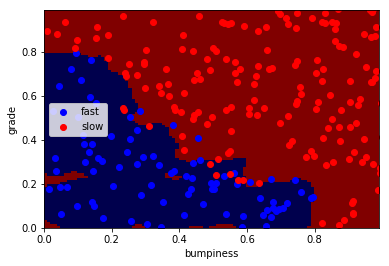

Train Data


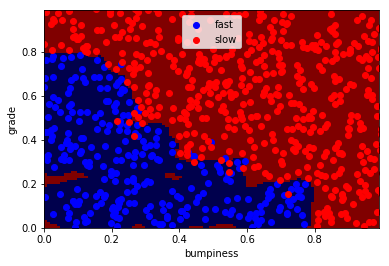

In [93]:
f_train,l_train,f_test,l_test = makeTerrainData()
C_value = 1
clf = SVC(kernel="rbf",C=C_value,gamma=700.0)#生成一个支持向量机,kernel 表示选用什么核函数，linear 是线性核函数 
clf.fit(f_train, l_train)
result = clf.predict(f_test)
#print(result)
#print(f_test)

num = 0
corr = 0
#print(len(result),len(l_test))

for x in range(0,len(result)):
    if result[x] == l_test[x]:
        corr+=1
    num += 1
print("The accuracy of SVM is",corr/num*100,"%")
print("Test Data")
prettyPicture(clf, f_test, l_test)
#plt.savefig('test.png', dpi = 300) 
plt.show()
print("Train Data")
prettyPicture(clf, f_train, l_train)
#plt.savefig('train.png', dpi = 300) 
plt.show()

In [ ]:
#把数据集改造成 x^2,y^2型特征，在此数据集中效果一般
fn_train = []
for x in range(0,len(f_train)):
    for n in range(0,2):
        #print(n)
        data = f_train[x][n]
        data = data*data
        fn_train.append(data)
fn_train = np.array(fn_train)
fn_train = fn_train.reshape(-1,2)

fn_test = []
for x in range(0,len(f_test)):
    for n in range(0,2):
        data = f_test[x][n]
        data = data*data
        fn_test.append(data)
fn_test = np.array(fn_test)
fn_test = fn_test.reshape(-1,2)
#print(fn_test)